In [116]:


CondutoresEspecificações = {"Bluejay":(8.702*10**-3,15.977*10**-3,29.544*10**-9), 
                             "Rail":(8.702*10**-3,14.796*10**-3,29.538*10**-9),
                             "Ruddy":(7.821*10**-3,14.364*10**-3,29.559*10**-9),
                             "Grossbeak":(7.456*10**-3,12.573*10**-3,29.538*10**-9),
                             "Dove":(6.988*10**-3,11.773*10**-3,29.567*10**-9),
                             "Penguim":(4.123*10**-3,7.150*10**-3,28.554*10**-9),
                             "Leghorn":(4.840*10**-3,6.7180*10**-3,29.586*10**-9),
                             "Minorca":(4.390*10**-3,6.0960*10**-3,29.579*10**-9),
                             "3/8 EHS":(0,4.570*10**-3,276.470*10**-9)}

#Name: (db,(Xc-1,Xc0,Xc1),(Yc-1,Yc,Yc+1),(Xpr,Ypr,Xpr2,Ypr2),n)
#n é o numero de condutores por fase
#db é o (diametro ou raio?) do circulo que forma os condutores
#Xc cordenadas dos centros dos 4 condutores
#Yc cordenadas dos centros dos 4 condutores PS: na formula nao sei se divide ou multiplica por fc (flecha)
CondutoresPosição = {"Bluejay":(.475,(-15.85,0,15.85),(35.9-2*20.9/3,35.9-2*20.9/3,35.9-2*20.9/3),(-14.45,45.9-2*14.7/3,14.45,45.9-2*14.7/3),4), 
                    "Rail Convencional":(,3),
                    "Rail Compacto":(0.008,(-4.275,0,4.275),(),(-3.5,26,3.5,26),4),#Nao entendi o db nesse modo
                    "Rail Normal":(.475,(-15,-11,-6,6,11,15),(23.2,33.2,23.2,23.2,33.2,23.2),(-8.8,42.7,8.8,42.7),4),
                    "Ruddy":(0.458,(7,0,-7),(10.5,10.5,10.5),(-5,20.5,5,20.5),2)
                    }

"rail recapacitado""

In [110]:
CondutoresPosição["Bluejay"][1]

(-15.85, 0, 15.85)

In [102]:
#Tem que por um for no para termos as info em todos os condutores. A principio funciona bem com circuito simples
#Preparar um if para saber se é circuito simples ou duplo e diversificar o tratamento. Ex: len(Xc)=2 Simples, len(Xc)=5 Duplo
from cmath import *
if (len(CondutoresPosição["Bluejay"][1])==2) #Circuito Simples
    Xc1=CondutoresPosição["Bluejay"][1][0]
    Xc2=CondutoresPosição["Bluejay"][1][1]
    Xc3=CondutoresPosição["Bluejay"][1][2]
    Yc1=CondutoresPosição["Bluejay"][2][0]
    Yc2=CondutoresPosição["Bluejay"][2][1]
    Yc3=CondutoresPosição["Bluejay"][2][2]

    db=CondutoresPosição["Bluejay"][0]
    
    #importante determinar quantos condutores temos pois a aplicação da formula da geometria e a matriz de posicao x e y vao mudar
    #Talvez valha a pena fazer algo com cos como o prof fez mas nao entendi mt bem
    
    if (CondutoresPosição["Bluejay"][4]==4) #Quatro condutores por fase
    
        #a formula a seguir foi imaginando um triangulo retangulo onde a hipotenusa vale db/2 e os catetos sao iguais a x.
        Xe1=Xc1-db/sqrt(8) #X a esquerda do primeiro condutor, dps os outros serao so somar a diferença entre os centros
        Xd1=Xc1+db/sqrt(8) #X a direita

        Ya1 = Yc1+db/sqrt(8) #Y alto
        Yb1 = Yc1-db/sqrt(8) #Y baixo


        posx = ((Xe1,Xd1,Xe1,Xd1),
                (Xe1+(Xc2-Xc1),Xd1+(Xc2-Xc1),Xe1+(Xc2-Xc1),Xd1+(Xc2-Xc1)),
                (Xe1+(Xc3-Xc1),Xd1+(Xc3-Xc1),Xe1+(Xc3-Xc1),Xd1+(Xc3-Xc1))    )


        posy = ((Ya1,Ya1,Yb1,Yb1),
                (Ya1,Ya1,Yb1,Yb1),
                (Ya1,Ya1,Yb1,Yb1))
        
    elif (CondutoresPosição["Bluejay"][4]==2) #Dois condutores por fase
        Xe1=Xc1-db
        Xd1=Xc1+db
        Ya1=Yc1
        Yb1=Yc1
        
        posx = ((Xe1,Xd1),
                (Xe1+(Xc2-Xc1),Xd1+(Xc2-Xc1)),
                (Xe1+(Xc2-Xc1),Xd1+(Xc2-Xc1)))
        
        posy = ((Ya1,Yb1),
                (Ya1,Yb1),
                (Ya1,Yb1))
        
    elif (CondutoresPosição["Bluejay"][4]==3 #Tres condutores por fase
    
    
elif(len(CondutoresPosição["Bluejay"][1])==5) #Circuito Duplo


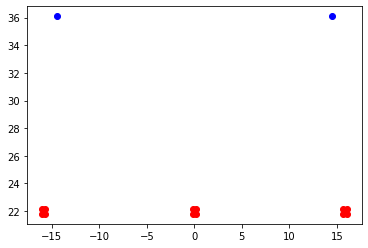

In [103]:
import matplotlib.pyplot as plt
for i in range(len(posx)):
    for j in range(len(posx[1])):
        plt.plot(posx[i][j],posy[i][j],"ro") #plot condutores em vermelho
        
for k in range(0,int(len(CondutoresPosição["Bluejay"][3])),2):
    plt.plot(CondutoresPosição["Bluejay"][3][k],CondutoresPosição["Bluejay"][3][k+1],"bo") #plot pararaio em azul


In [1]:
from numpy import exp, abs, angle, conj, sqrt
import numpy as np
from scipy.constants import mu_0, epsilon_0
from scipy.special import k1, k0, i1, i0
from mpmath import *
mp.dps = 25
mp.pretty = True


class Linha_transmissao:
    def __init__(self, epsilon_r, sigma_s, r_int, r_ext, nfase, npr, xc, yc, rhoc, rhoc_pr, rf, rpr):
        self.f = 60
        self.omega = 2*pi*self.f
        self.epsilon_r = epsilon_r
        self.sigma_s = sigma_s
        self.r_int = r_int
        self.r_ext = r_ext
        self.nfase = nfase
        self.npr = npr
        self.xc = xc
        self.yc = yc
        self.rhoc = rhoc
        self.rhoc_pr = rhoc_pr
        self.rf = rf
        self.rpr = rpr

    # Calcula a matriz de impedancia de retorno do solo
    def S1(self, xc, npr, yc, rf, rpr):
        ncond = len(self.xc)
        s1 = np.eye(ncond)*1j
        for i in range(ncond):
            for j in range(ncond):
                if(i != j):
                    s1[i, j] = log(
                        1 + (2/(eta * sqrt((self.xc[i] - self.xc[j])**2 + (self.yc[i]+self.yc[j])**2))))
                elif (i+1) <= (ncond-self.npr):
                    s1[i, j] = log(
                        (1 + 2/(eta * sqrt(4*self.yc[i]**2 + self.rf**2))))
                else:
                    s1[i, j] = log(
                        (1 + 2/(eta * sqrt(4*self.yc[i]**2 + self.rpr**2))))
        return s1

    def Mpot(self, xc, yc, npr, rf, rpr):
        # Calcula a matriz dos potenciais
        ncond = len(self.xc)
        pot = np.eye(ncond)*1j
        for i in range(ncond):
            for j in range(ncond):
                if i != j:  # entre fases
                    num = (self.xc[i]-self.xc[j])**2+(self.yc[i]+self.yc[j])**2
                    den = (self.xc[i]-self.xc[j])**2+(self.yc[i]-self.yc[j])**2
                    pot[i, j] = 0.5*log(num/den)
                elif (i+1) <= (ncond-self.npr):  # condutor de fase
                    pot[i, j] = log((2*(self.yc[i])/self.rf))
                else:  # para-raio
                    pot[i, j] = log((2*(self.yc[i])/self.rpr))
        return pot

    def zexternal(self, rho, npr, xc, yc, rf, rpr):
        p = sqrt(self.rho/(1j*self.omega*mu_0))
        ncond = len(self.xc)
        zout = np.eye(ncond)*1j
        for i in range(ncond):
            for j in range(ncond):
                if i != j:  # entre fases
                    num = (self.xc[i]-self.xc[j]**2) + \
                        (2*p+self.yc[i]+self.yc[j]**2)
                    den = (self.xc[i]-self.xc[j]**2)+(self.yc[i]-self.yc[j]**2)
                    zout[i, j] = 1j*self.omega*mu_0/(4*pi)*log(num/den)
                elif (i+1) <= (ncond-self.npr):
                    zout[i, j] = 1j*self.omega*mu_0 / \
                        (2*pi)*log((2*(self.yc[i]+p))/self.rf)
                else:
                    zout[i, j] = 1j*self.omega*mu_0 / \
                        (2*pi)*log((2*(self.yc[i]+p))/self.rpr)
        return zout

    def Zint(self, omega, rhoc, rf):
        # Calcula a impedancia interna de um condutor cilindrico
        etac = sqrt((1j*self.omega*mu_0)/self.rhoc)
        zint = rhoc*(etac/(2*pi*self.rf)) * \
            (i0(etac*self.rf)/i1(etac*self.rf))
    return zint

    def Zinttub(self, omega, rhoc, rf, ri):
        # Calcula a impedancia interna de um condutor tubular
        etac = sqrt((1j*omega*mu_0)/self.rhoc)
        num = i0(etac*self.rf)*k1(etac*self.ri) + \
            k0(etac*self.rf)*i1(etac*self.ri)
        den = i1(etac*self.rf)*k1(etac*self.ri) - \
            i1(etac*self.ri)*k1(etac*self.rf)
        zin = self.rhoc*(etac/(2*pi*self.rf))*(num/den)
    return zint

    def Zin(self, xc, npr, rhoc, rhoc_pr, rf, ri):
        ncond = len(self.xc)
        zin = np.eye(ncond)*1j
        rpr = 0  # qual a variavel?

        for i in range(ncond):
            for j in range(ncond):
                if i != j:  # entre fases
                    zin[i, j] = 0
                elif (i+1) <= (ncond-self.npr):  # cabos de fase
                    zin[i, j] = self.Zinttub(
                        self, omega, self.rhoc, self.rf, self.ri)
                else:  # pararaio
                    zin[i, j] = self.Zint(self.omega, self.rhoc_pr, self.rpr)
        return zin

    def impedancia(self):
        Z = self.Zin(self.xc, self.npr, self.rhoc, self.rhoc_pr, self.rf, self.ri) + (((1j*omega*mu_0)/2/pi)
                                                                                      * (self.Mpot(self.xc, self.yc, self.npr, self.rf, self.rpr) + self.S1(self.xc, self.npr, self.yc, self.rf, self.rpr)))
        return Z


SyntaxError: 'return' outside function (<ipython-input-1-94614ba87c75>, line 84)